Pandas is the shorthand for 'Python and Data Analysis'. It provides a rich set of features for exploring and manipulating data, making it the go-to toolkit for a lot of data scientists.

Check also: https://pandas.pydata.org/

In [1]:
import numpy as np
import pandas as pd
print(pd.__version__)

1.1.5


Creating some pandas series...

In [2]:
ser_a = pd.Series([1, 2, 3, 4], index=["a", "b", "c", "d"])
ser_b = pd.Series([1, 2, 3, 4], index=["b", "a", "c", "d"])

ser_a + ser_b

a    3
b    3
c    6
d    8
dtype: int64

... doing some element-wise operations

In [3]:
ser_a + ser_b
ser_a - ser_b
ser_a * ser_b
ser_a / ser_b

a    0.5
b    2.0
c    1.0
d    1.0
dtype: float64

... doing some aggregated operations 

In [4]:
ser_c = pd.Series([1, np.nan, 3, 4], index=["a", "b", "c", "d"])
print(ser_c.dtype)               # Which dtype has `ser_c`?

ser_c.count()             # => 3
ser_c.sum()               # => 8
ser_c.mean()              # => 2.67
ser_c.mean(skipna=False)  # => nan
ser_c.max()               # => 4
ser_c.min()               # => 1
ser_c.idxmax()            # => "d"

ser_d = pd.Series([1, "a", 3, 4], index=["a", "b", "c", "d"])
print(ser_d.dtype)        # which dtype has `ser_d`?

ser_e = pd.Series([1, 1, 1, np.nan, 3, 4])
ser_e

float64
object


0    1.0
1    1.0
2    1.0
3    NaN
4    3.0
5    4.0
dtype: float64

Cheking unique values

In [5]:
ser_e.unique() # => [ 1., nan,  3.,  4.]
ser_e.nunique() # => 3
ser_e.value_counts()

1.0    3
4.0    1
3.0    1
dtype: int64

Checking null values

In [6]:
ser_e.isna()

0    False
1    False
2    False
3     True
4    False
5    False
dtype: bool

In [7]:
ser_e.notna()

0     True
1     True
2     True
3    False
4     True
5     True
dtype: bool

In [8]:
ser_e.dropna()

0    1.0
1    1.0
2    1.0
4    3.0
5    4.0
dtype: float64

In [9]:
ser_e.fillna(ser_e.mean())

0    1.0
1    1.0
2    1.0
3    2.0
4    3.0
5    4.0
dtype: float64

In [10]:
ser_e.fillna(method="ffill")

0    1.0
1    1.0
2    1.0
3    1.0
4    3.0
5    4.0
dtype: float64

In [11]:
ser_e.fillna(method="bfill")

0    1.0
1    1.0
2    1.0
3    3.0
4    3.0
5    4.0
dtype: float64

Creating pandas dataframes

In [12]:
# create a dataframe with random data
import random
random.seed(3)
df = pd.DataFrame([[random.randint(0, 9) for i in range(10)] for i in range(5)],
                  index=[i for i in range(5)], 
                  columns=list('abcdefghij'))
df

,a,b,c,d,e,f,g,h,i,j
0,3,9,8,2,5,9,7,9,1,9
1,0,7,4,8,3,3,7,8,8,7
2,6,2,3,2,8,6,0,1,2,9
3,0,4,0,4,7,9,6,6,6,9
4,7,2,5,1,0,2,7,3,4,6


Doing some operations with pandas dataframes

In [13]:
# Select a column (i.e., a series)
df['a']

# Add another column
df['k'] = df['a'] * df['b']

# Get the headers (i.e., the column names)
df.columns

# Get just the first two rows
df.head(2)

# Get just the last two rows
df.tail(2)

# Sort the dataframe by columns
df.sort_values(by=['a', 'b'], ascending=[False, True])

# To get some statistics (e.g., count, mean, std, min, etc.)
df.describe()

,a,b,c,d,e,f,g,h,i,j,k
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000
mean,3.200000,4.800000,4.000000,3.400000,4.600000,5.800000,5.40000,5.400000,4.200000,8.000000,10.600000
std,3.271085,3.114482,2.915476,2.792848,3.209361,3.271085,3.04959,3.361547,2.863564,1.414214,11.260551
min,0.000000,2.000000,0.000000,1.000000,0.000000,2.000000,0.00000,1.000000,1.000000,6.000000,0.000000
25%,0.000000,2.000000,3.000000,2.000000,3.000000,3.000000,6.00000,3.000000,2.000000,7.000000,0.000000
50%,3.000000,4.000000,4.000000,2.000000,5.000000,6.000000,7.00000,6.000000,4.000000,9.000000,12.000000
75%,6.000000,7.000000,5.000000,4.000000,7.000000,9.000000,7.00000,8.000000,6.000000,9.000000,14.000000
max,7.000000,9.000000,8.000000,8.000000,8.000000,9.000000,7.00000,9.000000,8.000000,9.000000,27.000000


Importing the data from a csv file.
Check also: https://www.kaggle.com/camnugent/california-housing-prices

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

From https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/
"This data has metrics such as the population, median income, median housing price, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). We will just call them “districts”
for short. Your model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.

In [14]:
df = pd.read_csv("../datasets/housing.csv", delimiter=",")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Dataset description

1. `longitude`: A measure of how far west a house is; a higher value is farther west
2. `latitude`: A measure of how far north a house is; a higher value is farther north
3. `housingMedianAge`: Median age of a house within a block; a lower number is a newer building
4. `totalRooms`: Total number of rooms within a block
5. `totalBedrooms`: Total number of bedrooms within a block
6. `population`: Total number of people residing within a block
7. `households`: Total number of households, a group of people residing within a home unit, for a block
8. `medianIncome`: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. `medianHouseValue`: Median house value for households within a block (measured in US Dollars)
10. `oceanProximity`: Location of the house w.r.t ocean/sea

In [15]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Missing values
There are some missing values for `total_bedrooms`. What should we do?

Most Machine Learning algorithms cannot work with missing features. We have three options:
- Get rid of the corresponding districts. (`df.dropna(subset=["total_bedrooms"])`)
- Get rid of the whole attribute. (`df.drop("total_bedrooms", axis=1`)
- Set the values to some value (zero, the mean, the median, etc.). (`df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)`)

#### Non-numeric attributes
`ocean_proximity` is a text attribute so we cannot compute its median. Some options:
- Get rid of the whole attribute. (`df.drop("ocean_proximity", axis=1`)
- Change from categorical to ordinal. Can foresee any problem in this? One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as “bad”, “average”, “good”, “excellent”), but it is obviously not the case for the ocean_proximity column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1). To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are sometimes called dummy attributes
- Change to one hot encoding

In [16]:
# Change from categorical to ordinal
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit_transform(df[["ocean_proximity"]])

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [17]:
# from categorical to one-hot encoding
# from sklearn.preprocessing import OneHotEncoder
# cat_encoder = OneHotEncoder()
# housing_cat_1hot = cat_encoder.fit_transform(df[["ocean_proximity"]])
# housing_cat_1hot

y = pd.get_dummies(df["ocean_proximity"], prefix='ocean_proximity')
df = pd.concat([df, y], axis=1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


Visualizing attribute distributions

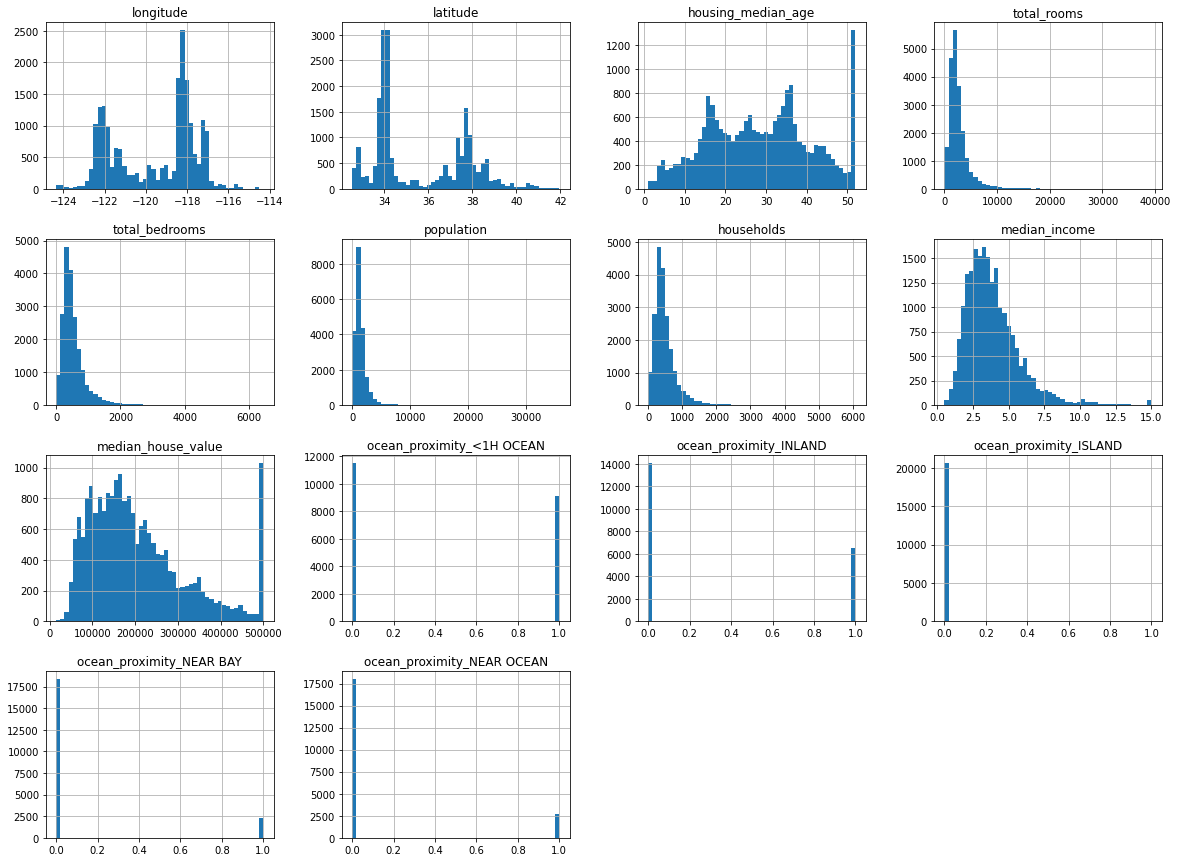

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

Open questions:

- `median_income` should be in dollars. However, it has a strange range. Why? "you are told that the data has been scaled and capped at 15 (actually 15.0001) for higher median incomes, and at 0.5 (actually 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars. The numbers represent roughly tens of thousands of dollars"
- `housing_median_age` and `median_house_value` are capped. As to `median_house_value`, this is a serious problem since it is your target attribute (your labels). Your Machine Learning algorithms may learn that prices never go beyond that limit. You need to check with your client team (the team that will use your system’s output) to see if this is a problem or not. If they tell you that they need precise predictions even beyond 500,000USD, then you have mainly two options: (a) collect proper labels for the districts whose labels were capped, (b) remove those districts from the training set."
- These attributes have very different scales. Should we scale them?
- Many histograms are tail heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns